In [3]:
# 라이브러리 
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# 1. 데이터 준비
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
# 정규화
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
# 카테고리화
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 2. 모델 작성(Sequential)
cnn = Sequential()
cnn.add(Conv2D(6,(5,5), padding='same',activation='relu', input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))
cnn.add(Conv2D(16,(5,5), padding='valid',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))
cnn.add(Conv2D(120,(5,5), padding='valid',activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(units=84, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

# 3. 모델 컴파일
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
# cnn.summary()
# 4. 모델 훈련
cnn.fit(x_train,y_train, batch_size=128, epochs=30, validation_data=(x_test,y_test), verbose=2)

# 5. 훈련 검증
res = cnn.evaluate(x_test, y_test, verbose=0)
print('정확률=', res[1]*100)

Epoch 1/30
469/469 - 5s - 11ms/step - accuracy: 0.9017 - loss: 0.3246 - val_accuracy: 0.9723 - val_loss: 0.0868
Epoch 2/30
469/469 - 4s - 9ms/step - accuracy: 0.9747 - loss: 0.0816 - val_accuracy: 0.9831 - val_loss: 0.0546
Epoch 3/30
469/469 - 3s - 6ms/step - accuracy: 0.9841 - loss: 0.0533 - val_accuracy: 0.9870 - val_loss: 0.0402
Epoch 4/30
469/469 - 3s - 7ms/step - accuracy: 0.9865 - loss: 0.0429 - val_accuracy: 0.9887 - val_loss: 0.0341
Epoch 5/30
469/469 - 3s - 7ms/step - accuracy: 0.9890 - loss: 0.0357 - val_accuracy: 0.9870 - val_loss: 0.0405
Epoch 6/30
469/469 - 3s - 7ms/step - accuracy: 0.9906 - loss: 0.0299 - val_accuracy: 0.9896 - val_loss: 0.0306
Epoch 7/30
469/469 - 3s - 6ms/step - accuracy: 0.9920 - loss: 0.0254 - val_accuracy: 0.9893 - val_loss: 0.0341
Epoch 8/30
469/469 - 3s - 6ms/step - accuracy: 0.9928 - loss: 0.0220 - val_accuracy: 0.9896 - val_loss: 0.0318
Epoch 9/30
469/469 - 3s - 7ms/step - accuracy: 0.9934 - loss: 0.0197 - val_accuracy: 0.9898 - val_loss: 0.0321


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
Epoch 1/100
391/391 - 15s - 39ms/step - accuracy: 0.4117 - loss: 1.6006 - val_accuracy: 0.5438 - val_loss: 1.2673
Epoch 2/100
391/391 - 14s - 37ms/step - accuracy: 0.5655 - loss: 1.2148 - val_accuracy: 0.6289 - val_loss: 1.0525
Epoch 3/100
391/391 - 15s - 38ms/step - accuracy: 0.6328 - loss: 1.0392 - val_accuracy: 0.6704 - val_loss: 0.9411
Epoch 4/100
391/391 - 15s - 38ms/step - accuracy: 0.6733 - loss: 0.9200 - val_accuracy: 0.7047 - val_loss: 0.8346
Epoch 5/100
391/391 - 14s - 37ms/step - accuracy: 0.7035 - loss: 0.8343 - val_accuracy: 0.7245 - val_loss: 0.7823
Epoch 6/100
391/391 - 14s - 37ms/step - accuracy: 0.7307 - loss: 0.7677 - val_accuracy: 0.7420 - val_loss: 0.7478
Epoch 7/100
391/391 - 15s - 37ms/step - accuracy: 0.7481 - loss: 0.7162 - val_accuracy: 0.7513 - val_loss: 0.7244
Epoch 8/100
391/391 - 15s - 39ms/step - accuracy: 0.7663 - loss: 0.6601 - val_accuracy: 0.7524 - val_loss: 0.7059
Epoch 9/100
391/391 - 15s - 39ms/s

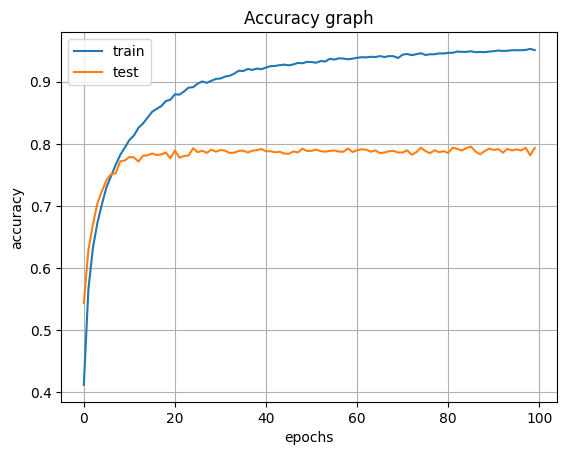

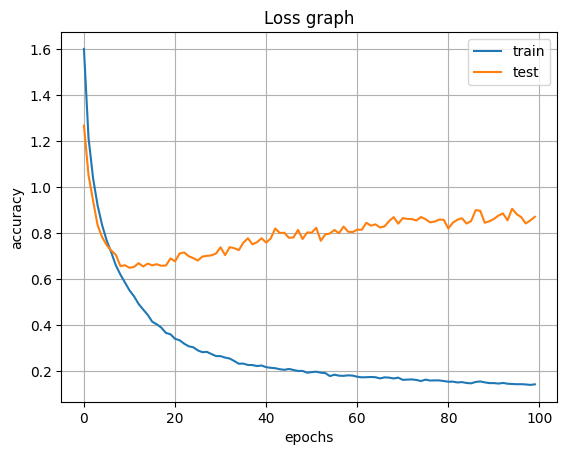

In [4]:
# 라즈베리 
# 8-2.py  CIFAR-10
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense
from tensorflow.keras.optimizers import Adam

# 데이터 처리
(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 모델... 
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=512,activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(units=10,activation='softmax'))

# 모델 컴파일
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy']) 
# 모델 훈련, 결과
hist = cnn.fit(x_train,y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test),verbose=2)

# 모델 검증                                   
res=cnn.evaluate(x_test,y_test,verbose=0) 
print('정확률=',res[1]*100)

# 그래프로 표현
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

In [ ]:
# MNIST에 합성곱 모델을 적용한 코드 
# 이후 얻어진 모델을 통해서 숫자 인식 프로그램에 적용
# 라즈베리 
# 8-2.py  CIFAR-10
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense
from tensorflow.keras.optimizers import Adam

# 데이터 처리
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 모델... 
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=10,activation='softmax'))

# 모델 컴파일
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy']) 
# 모델 훈련, 결과
hist = cnn.fit(x_train,y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test),verbose=2)

# 모델 저장
cnn.save('cnn_v2.h2')

# 모델 검증                                   
res=cnn.evaluate(x_test,y_test,verbose=0) 
print('정확률=',res[1]*100)

# 그래프로 표현
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()
